In [1]:
import requests
import bs4
import re
from time import sleep
import random
import networkx as nx

When you look at a website using a web browser what you see is a rendered view from an HTML code. This graphical version is much easier for us to read, however, it's not trivial to automatize the process of any data retrieval from it. That's why we will use raw HTML form

The first step is to download the content. We can use a request library. Basic usage is very simple.

In [2]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')
response.status_code # it's wise to check the status code 

200

In [3]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Poznań University of Technology - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

Working with such a string might be problematic. However, HTML is structured and we can benefit from it. The Beautiful Soup package transforms HTML string into a tree form and allows us to query it in a much more efficient and easier way.

In [4]:
parsed = bs4.BeautifulSoup(response.text)
parsed

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Poznań University of Technology - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-cli

Typically text content is stored in a paragraph element denoted with a 'p' tag. We can take a look at the text from all paragraphs.

In [5]:
for p in parsed.select('p'):
    print(p.getText())



Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1,100 academic staff.

There are nine faculties (since 2020):

Poznan University of Technology (PUT)

## Task1
Implement a function getText(url) 
 - download content from a given url
 - transform it using bs
 - return text from all paragraphs

In [54]:
def getText(url):
    output = ""
    response = requests.get(url)
    if response.status_code != 200:
        output = "Error: status code", response.status_code
    else: 
        parsed_text = bs4.BeautifulSoup(response.text)

        for p in parsed_text.select('p'):
            output += p.getText() + "\n"
            
    return print(output)

In [55]:
getText('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')



Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1,100 academic staff.

There are nine faculties (since 2020):

Poznan University of Technology (PUT)

In [58]:
getText("https://github.com")

We read every piece of feedback, and take your input very seriously.

            To see all available qualifiers, see our documentation.
          
Join the world’s most widely adopted AI-powered developer platform.
Build code quickly and more securely with GitHub Copilot embedded throughout your workflows.
With GitHub Copilot embedded throughout the platform, you can simplify your toolchain, automate tasks, and improve the developer experience.
1Survey: The AI wave continues to grow on software development teams, 2024.
Duolingo boosts developer speed by 25% with GitHub Copilot
2024 Gartner® Magic Quadrant™ for AI Code Assistants
Optimize your process with simple and secured CI/CD.
Start building instantly with a comprehensive dev environment in the cloud.
Manage projects and chat with GitHub Copilot from anywhere.
Sync with 17,000+ integrations and a growing library of Copilot Extensions.
Use AI to find and fix vulnerabilities—freeing your teams to ship more secure software faster.
S

Nowadays websites are often dynamic, not static. Working with them would require dealing with javascript. It's possible and there are python packages supporting this processing but we will not cover them in this course.

In [57]:
getText("http://facebook.com")

## Task 2
Extract number of students from infobox table

In [34]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')
parsed = bs4.BeautifulSoup(response.text)
parsed.find('table')

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special

In this task, you have to extract specific information from a specific table. The table we are interested in is of class infobox and bs allows us to use this information.

In [37]:
parsed.find('table', class_="infobox")

<table class="infobox vcard"><caption class="infobox-title fn org">Poznań University of Technology</caption><tbody><tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr><tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" tit

Since bs creates a tree structure you can navigate through it and use methods find and find_all on the next nodes.

In [36]:
parsed.find('table', class_="infobox").find_all("tr")

[<tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr>,
 <tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" title="Rector (academia)">Rector</a></th><td class="infobox-data">PhD, Prof. Teofil Jesionowski</td></

In [38]:
parsed.find('table', class_="infobox").find_all("tr")[6]

<tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Students</th><td class="infobox-data">14,138<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup> <small>(12.2023)</small></td></tr>

In [39]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('th').text

'Students'

In [40]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('td').text

'14,138[1] (12.2023)'


Write a function that returns the number of students from the infobox table from the provided URL. You can use inspect tool - just right click on a website, choose inspect and analyze the html structure.

In [82]:
import re

def getStudentCount(url):
    response = requests.get(url)
    if response.status_code != 200:
        return "Error: status code", response.status_code
    else: 
        parsed_text = bs4.BeautifulSoup(response.text)
        rows = parsed_text.find('table', class_="infobox").find_all("tr")

        for row in rows:
            header = row.find('th')
            if header and header.string == 'Students':
                student_text = row.find('td').text.replace(',', '')
                student_number = re.findall(r'\d+', student_text)[0]
                return int(student_number)
            
    return "Number of students not found"


In [83]:
getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology")

14138

In [87]:
assert getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology") == 14138

In [88]:
assert getStudentCount("https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology") == 20970

# Regex
Regular expression is a scheme for defining patterns to be found in a text

Let's try it  https://regexone.com/

## Task 3

We can also retrieve URLs and once we have them we can scrape them as well.

In [89]:
parsed.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia"><span>Help</span></a>,
 <a href="/wiki/Help:Introduction" title="Learn how to edit Wikipedia"><span>Learn to edit</span></a>,
 <a href="/wiki/Wikipedia:Community_portal" title="The

It's important to add some delay between accessing the next page. Otherwise, you might cause too much traffic and be temporarily banned

In [90]:
links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')}) # find all links starting with /wiki
random.shuffle(links)
for link in links[:10]:
    print(link['href'])
    response = requests.get("https://en.wikipedia.org" + link['href'])
    print(response.status_code)
    sleep(random.random()*3)

/wiki/Category:Pozna%C5%84_University_of_Technology_alumni
200
/wiki/Wikipedia:Contents
200
/wiki/Socrates-Erasmus
200
/wiki/Technion_%E2%80%93_Israel_Institute_of_Technology
200
/wiki/Krak%C3%B3w_University_of_Economics
200
/wiki/Category:Coordinates_on_Wikidata
200
/wiki/Norwegian_University_of_Science_and_Technology
200
/wiki/Technical_University_of_Berlin
200
/wiki/%C3%89cole_Polytechnique_F%C3%A9d%C3%A9rale_de_Lausanne
200
/wiki/Special:Random
200


implement DFS based on the code above, try to avoid links not leading to an article

In [119]:
def dfs(link):
    visited = set()
    stack = [link]
    
    while stack:
        link = stack.pop()
        if link not in visited:
            visited.add(link)
            if len(visited) > 10:
                break
            print(f"Visiting: {link}")
            
            response = requests.get(link)
            parsed = bs4.BeautifulSoup(response.text, "html.parser")
            
            links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
            for a_tag in links:
                href = a_tag['href']
                full_link = "https://en.wikipedia.org" + href
                if full_link not in visited and ':' not in href:
                    stack.append(full_link)

In [120]:
dfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

Visiting: https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology
Visiting: https://en.wikipedia.org/wiki/University_College_Dublin
Visiting: https://en.wikipedia.org/wiki/University_of_Rochester
Visiting: https://en.wikipedia.org/wiki/University_of_York
Visiting: https://en.wikipedia.org/wiki/University_of_Sheffield
Visiting: https://en.wikipedia.org/wiki/List_of_universities_in_the_United_Kingdom
Visiting: https://en.wikipedia.org/wiki/National_Science_Week
Visiting: https://en.wikipedia.org/wiki/Wikisource
Visiting: https://en.wikipedia.org/wiki/Semantic_publishing
Visiting: https://en.wikipedia.org/wiki/Self-publishing


write BFS with printing current link

In [117]:
from collections import deque

def bfs(link):
    visited = set()
    queue = deque([link])
    
    while queue:
        link = queue.popleft()
        if link not in visited:
            visited.add(link)
            if len(visited) > 10:
                break
            print(f"Visiting: {link}")
            
            response = requests.get(link)
            parsed = bs4.BeautifulSoup(response.text, "html.parser")
            
            links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
            for a_tag in links:
                href = a_tag['href']
                full_link = "https://en.wikipedia.org" + href
                if full_link not in visited and ':' not in href:
                    queue.append(full_link)
                    # sleep(random.random() * 3)  # Add delay to avoid too much traffic
                

In [118]:
bfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

Visiting: https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology
Visiting: https://en.wikipedia.org/wiki/Main_Page
Visiting: https://en.wikipedia.org/wiki/Geographic_coordinate_system
Visiting: https://en.wikipedia.org/wiki/Latin_language
Visiting: https://en.wikipedia.org/wiki/Public_university
Visiting: https://en.wikipedia.org/wiki/Rector_(academia)
Visiting: https://en.wikipedia.org/wiki/Pozna%C5%84
Visiting: https://en.wikipedia.org/wiki/Greater_Poland_Voivodeship
Visiting: https://en.wikipedia.org/wiki/Poland
Visiting: https://en.wikipedia.org/wiki/Conference_of_European_Schools_for_Advanced_Engineering_Education_and_Research


## Networkx

It's a package for working with various networks

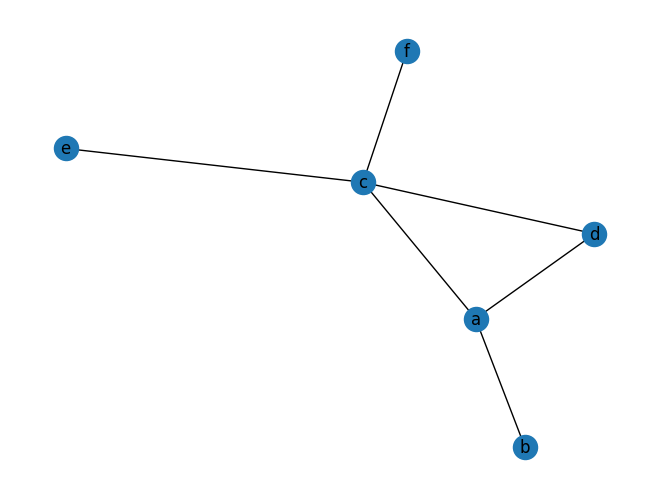

In [107]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")

nx.draw(G, with_labels=True)


Can you plot a graph of Wikipedia links? Extend the bfs function by plotting a network. Limit the search to a reasonable number of nodes.

# Scrapy

Scrapy is an efficient library for web crawling and scraping. It has a slightly higher entrance level than requests + bs but it's much easier for complex tasks.

In [1]:
import requests
import bs4
import re
from time import sleep
import random

import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
class MySpider(scrapy.Spider):
    name = "lab1"

    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        quotes = response.css('div.quote')
        for quote in quotes: # you can extract data you need
            yield {
                'text': quote.css('.text::text').get(),
                'author': quote.css('.author::text').get(),
            }

        next_page = response.css('li.next a::attr(href)').get() #find next URL

        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse) #and process it

In [3]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider)
process.start() 

2024-12-18 00:26:02 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2024-12-18 00:26:02 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.11.7, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.11.0, Python 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)], pyOpenSSL 24.3.0 (OpenSSL 3.4.0 22 Oct 2024), cryptography 44.0.0, Platform Windows-10-10.0.22631-SP0
2024-12-18 00:26:02 [scrapy.addons] INFO: Enabled addons:
[]
2024-12-18 00:26:02 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2024-12-18 00:26:02 [scrapy.extensions.telnet] INFO: Telnet Password: bcf7cefcbb2873e7
2024-12-18 00:26:03 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2024-12-18 00:26:03 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2

## Additional task

Which color of a car is the most expensive? Analyze offers from https://www.olx.pl/motoryzacja/samochody/ some of them leads to olx while other to otomoto. Can you use data from both sources?

<details>

<summary>Bonus</summary>

Funny website for scraping https://web.archive.org/web/20190615072453/https://sirius.cs.put.poznan.pl/~inf66204/WKC.html
</details>